<a href="https://colab.research.google.com/github/shicoded/Mobile_price_regression/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from tabulate import tabulate
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/dataset_folder/mobile data/mobile phone price prediction.csv')

# Display the first few rows of the dataframe to understand its structure

print(tabulate(data.head(10), headers='keys', tablefmt='psql'))

+----+--------------+--------------------------------------+----------+--------------+------------------------------+----------+------------------+------------+----------------------------------------------------------+------------------------------------+-------------------+---------+-----------+------------------+-------------------+----------------------------------------------+---------------------+------------------+
|    |   Unnamed: 0 | Name                                 |   Rating |   Spec_score | No_of_sim                    | Ram      | Battery          | Display    | Camera                                                   | External_Memory                    |   Android_version | Price   | company   | Inbuilt_memory   | fast_charging     | Screen_resolution                            | Processor           | Processor_name   |
|----+--------------+--------------------------------------+----------+--------------+------------------------------+----------+------------------+-

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# data['Price']=data['Price'].str.replace(',', '').astype(float) # Convert the 'Price' column to a numerical type

data.drop_duplicates(inplace=True) # Remove duplicate rows if any
dummie_df = pd.get_dummies(data, drop_first=True) # Create dummy variables for categorical features



In [6]:
# Identify features with a correlation greater than 0.15 with the target variable
corr_u =dummie_df.corr()['Price'].sort_values(ascending=False, key=abs)>0.15
corr_u.index = corr_u.index.str.replace(',','')
dummie_df.columns=dummie_df.columns.str.replace(',','')

In [ ]:
dummie_df.columns=dummie_df.columns.str.replace(',','')
# Drop features with low correlation
for i in range(len(corr_u)):
    if corr_u[i] == False:
        #
        dummie_df.drop(columns=corr_u.index[i], inplace=True)

In [ ]:
# Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split

X = dummie_df.drop(columns='Price')
y = dummie_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
tree_model = DecisionTreeRegressor(random_state=0)

# Train the model
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y1_pred = model.predict(X_test)
y2_pred = tree_model.predict(X_test)

rmse_1 = mean_squared_error(y_test, y1_pred, squared=False)
r2_1 = r2_score(y_test, y1_pred)
rmse_2 = mean_squared_error(y_test, y2_pred, squared=False)
r2_2 = r2_score(y_test, y2_pred)

print(f'RMSE: {rmse_1}')
print(f'R-Squared: {r2_1}')
print(f'RMSE: {rmse_2}')
print(f'R-Squared: {r2_2}')

RMSE: 12859.929259561033
R-Squared: 0.768429310116592
RMSE: 15802.692094109314
R-Squared: 0.6503217768222481


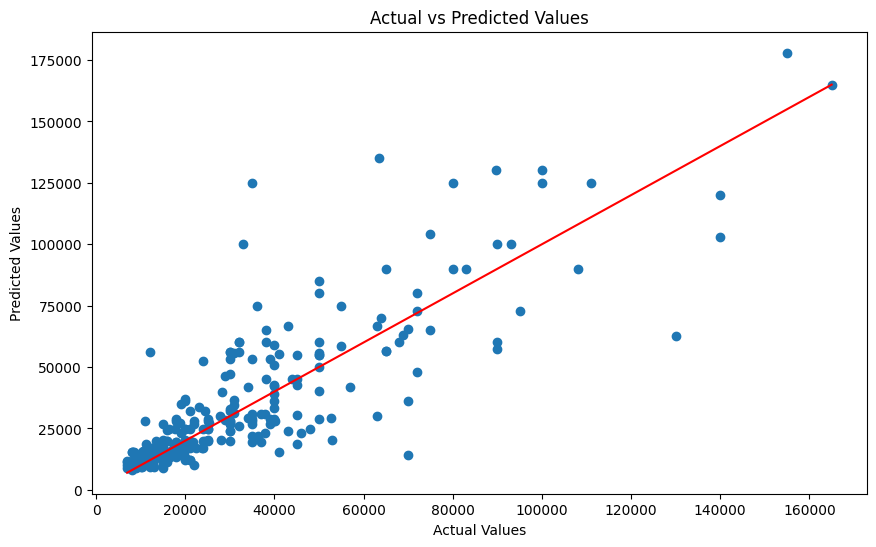

In [ ]:
# Compare actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y2_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

Linear Regression RMSE: 12859.929259561033
Linear Regression R-Squared: 0.768429310116592
Decision Tree RMSE: 15802.692094109314
Decision Tree R-Squared: 0.6503217768222481


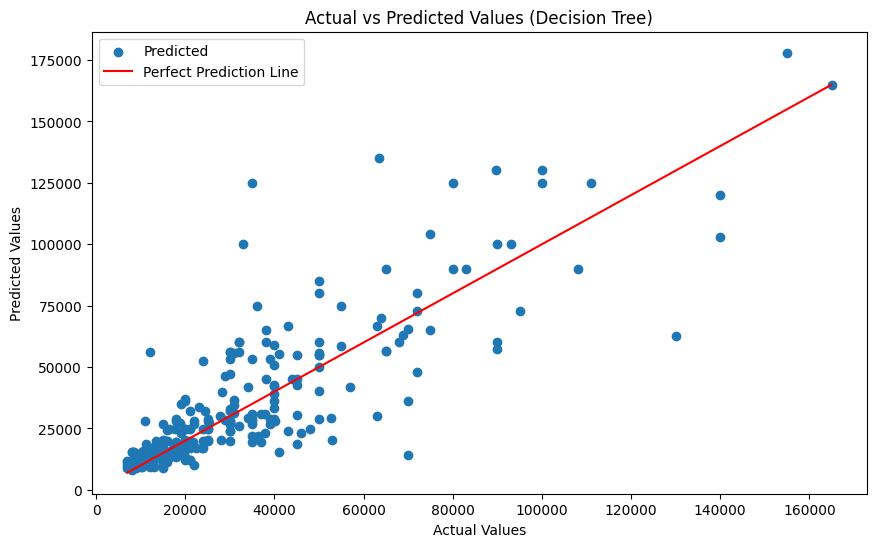

In [ ]:
# Print performance metrics
print(f'Linear Regression RMSE: {rmse_1}')
print(f'Linear Regression R-Squared: {r2_1}')
print(f'Decision Tree RMSE: {rmse_2}')
print(f'Decision Tree R-Squared: {r2_2}')

# Compare actual and predicted values for Decision Tree
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y2_pred, label='Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Decision Tree)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction Line')
plt.legend()
plt.show()



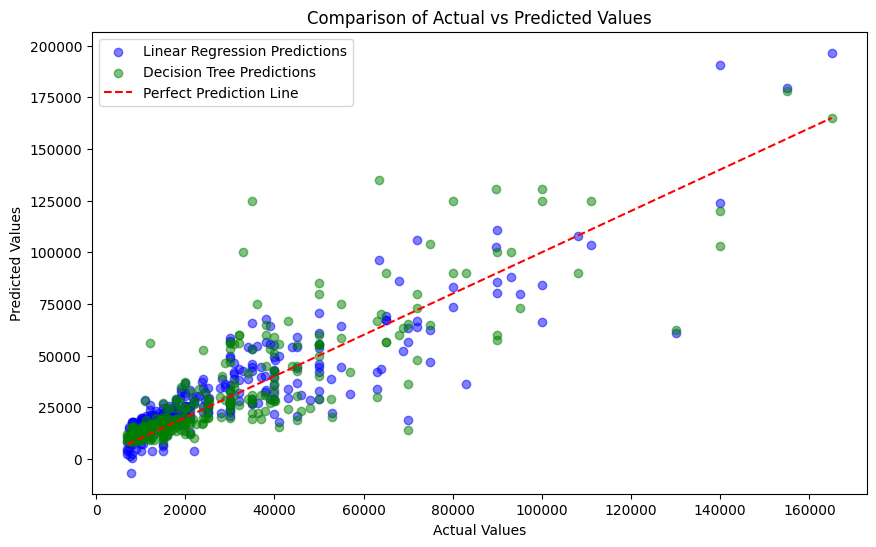

Linear Regression has a lower RMSE and is better for this dataset.


In [ ]:
# Compare both models' predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y1_pred, alpha=0.5, label='Linear Regression Predictions', color='blue')
plt.scatter(y_test, y2_pred, alpha=0.5, label='Decision Tree Predictions', color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.legend()
plt.show()

# Conclusion
if rmse_1 < rmse_2:
    print("Linear Regression has a lower RMSE and is better for this dataset.")
else:
    print("Decision Tree has a lower RMSE and is better for this dataset.")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')